In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Connecting to drive
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Capstone/train - Copy(4).csv')

Mounted at /content/drive


In [3]:
df.head()

ID  Customer_ID  Month           Name  Age        SSN Occupation  \
0  5634         3392      1  Aaron Maashoh   23  821000265  Scientist   
1  5635         3392      2  Aaron Maashoh   23  821000265  Scientist   
2  5636         3392      3  Aaron Maashoh   23  821000265  Scientist   
3  5637         3392      4  Aaron Maashoh   23  821000265  Scientist   
4  5638         3392      5  Aaron Maashoh   23  821000265  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0       19114.12            1824.843333                  3  ...   
1       19114.12            1824.843333                  3  ...   
2       19114.12            1824.843333                  3  ...   
3       19114.12            1824.843333                  3  ...   
4       19114.12            1824.843333                  3  ...   

   Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0            809.98                 26.822620                 265   
1            809.98                 31.944960                 266   
2            809.98                 28.609352                 267   
3            809.98                 31.377862                 268   
4            809.98                 24.797347                 269   

  Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                    No            49.574949                 21.46538   
1                    No            49.574949                 21.46538   
2                    No            49.574949                 21.46538   
3                    No            49.574949                 21.46538   
4                    No            49.574949                 21.46538   

                  Payment_Behaviour  Monthly_Balance Credit_Score  \
0   High_spent_Small_value_payments       312.494089         Good   
1    Low_spent_Large_value_payments       284.629163         Good   
2   Low_spent_Medium_value_payments       331.209863         Good   
3    Low_spent_Small_value_payments       223.451310         Good   
4  High_spent_Medium_value_payments       341.489231         Good   

   Credit_Value  
0           727  
1           894  
2           799  
3           728  
4           739  

[5 rows x 29 columns]

In [4]:
credit_ranges = {
    'Good': (701, 900),
    'Standard': (551, 700),
    'Poor': (400, 550)
}

In [5]:
# Generate credit values based on credit score and monthly balance
attributes = {
    'Month': 0.0392,
    'Age': 0.0379,
    'Annual_Income': 0.0414,
    'Monthly_Inhand_Salary': 0.0414,
    'Num_Bank_Accounts': 0.0288,
    'Num_Credit_Card': 0.0378,
    'Interest_Rate': 0.0699,
    'Num_of_Loan': 0.0254,
    'Delay_from_due_date': 0.0582,
    'Num_of_Delayed_Payment': 0.0374,
    'Changed_Credit_Limit': 0.0568,
    'Num_Credit_Inquiries': 0.0464,
    'Outstanding_Debt': 0.1072,
    'Credit_Utilization_Ratio': 0.0477,
    'Credit_History_Age': 0.0651,
    'Total_EMI_per_month': 0.0438,
    'Amount_invested_monthly': 0.0419,
    'Monthly_Balance': 0.0495
}
# Calculate the weighted sum of attributes
#weighted_sum = sum(attributes[attr] * row[attr] for attr in attributes)
def generate_credit_value(row):
    weighted_sum = sum(attributes[attr] * row[attr] for attr in attributes)
    min_range, max_range = credit_ranges[row['Credit_Score']]
    credit_score_range = max_range - min_range
    credit_score = min_range + (credit_score_range / 10000) * weighted_sum
    #credit_score = min_range + (credit_score_range / 10000) * row['Monthly_Balance']
    return credit_score

In [6]:
mydf = df.drop(columns = 'Credit_Value')

In [7]:
mydf = df.dropna()

In [8]:
mydf['Credit_Value'] = mydf.apply(generate_credit_value, axis=1)

In [9]:
mydf.head()

ID  Customer_ID  Month           Name  Age        SSN Occupation  \
0  5634         3392      1  Aaron Maashoh   23  821000265  Scientist   
1  5635         3392      2  Aaron Maashoh   23  821000265  Scientist   
2  5636         3392      3  Aaron Maashoh   23  821000265  Scientist   
3  5637         3392      4  Aaron Maashoh   23  821000265  Scientist   
4  5638         3392      5  Aaron Maashoh   23  821000265  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0       19114.12            1824.843333                  3  ...   
1       19114.12            1824.843333                  3  ...   
2       19114.12            1824.843333                  3  ...   
3       19114.12            1824.843333                  3  ...   
4       19114.12            1824.843333                  3  ...   

   Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0            809.98                 26.822620                 265   
1            809.98                 31.944960                 266   
2            809.98                 28.609352                 267   
3            809.98                 31.377862                 268   
4            809.98                 24.797347                 269   

  Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                    No            49.574949                 21.46538   
1                    No            49.574949                 21.46538   
2                    No            49.574949                 21.46538   
3                    No            49.574949                 21.46538   
4                    No            49.574949                 21.46538   

                  Payment_Behaviour  Monthly_Balance Credit_Score  \
0   High_spent_Small_value_payments       312.494089         Good   
1    Low_spent_Large_value_payments       284.629163         Good   
2   Low_spent_Medium_value_payments       331.209863         Good   
3    Low_spent_Small_value_payments       223.451310         Good   
4  High_spent_Medium_value_payments       341.489231         Good   

   Credit_Value  
0    720.770552  
1    720.747808  
2    720.794835  
3    720.687823  
4    720.806735  

[5 rows x 29 columns]

In [10]:
# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns

In [11]:
# Remove 'Name' and 'Type_of_Loan' from categorical features
categorical_features = [feat for feat in categorical_features if feat not in ['Name', 'Type_of_Loan']]

In [12]:
print(categorical_features)

['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


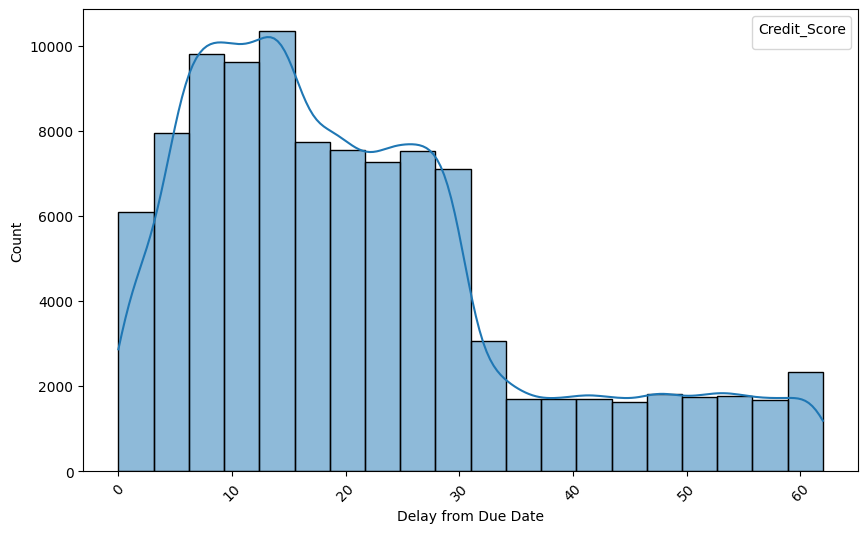

In [13]:
# Plot a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Delay_from_due_date', bins=20, kde=True)
plt.xlabel('Delay from Due Date')
plt.ylabel('Count')
plt.legend(title='Credit_Score')
plt.xticks(rotation=45)
plt.show()

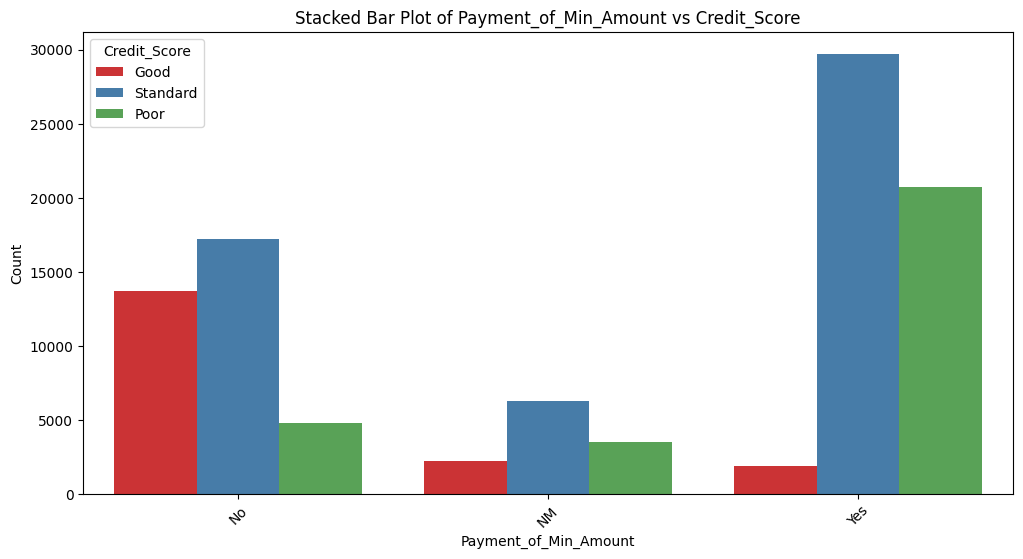

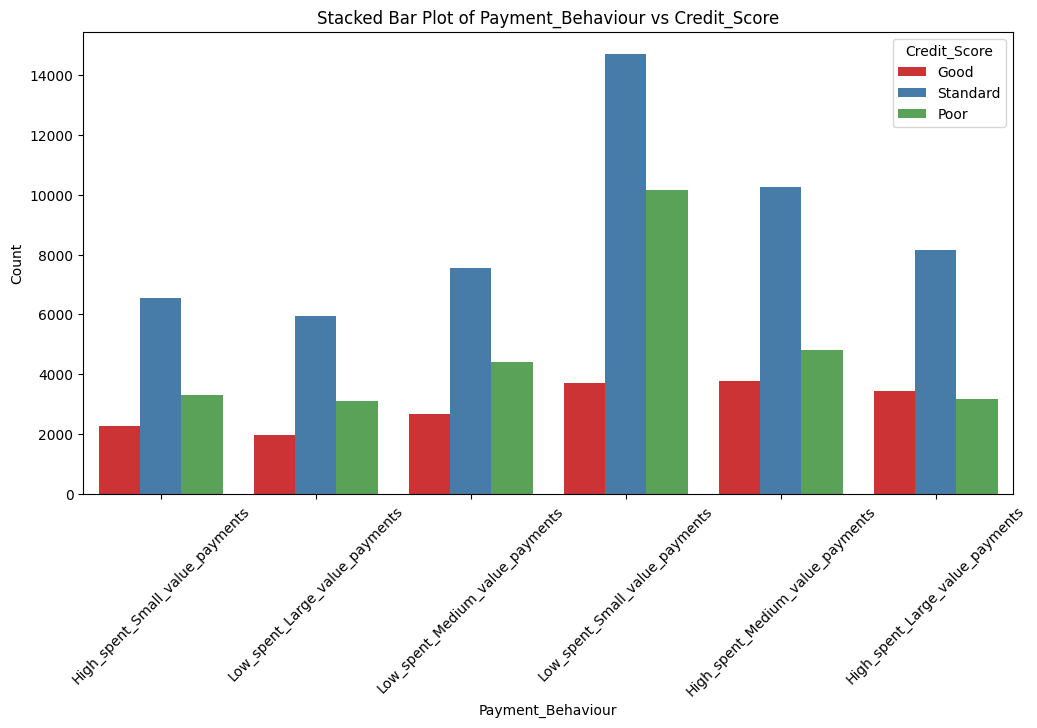

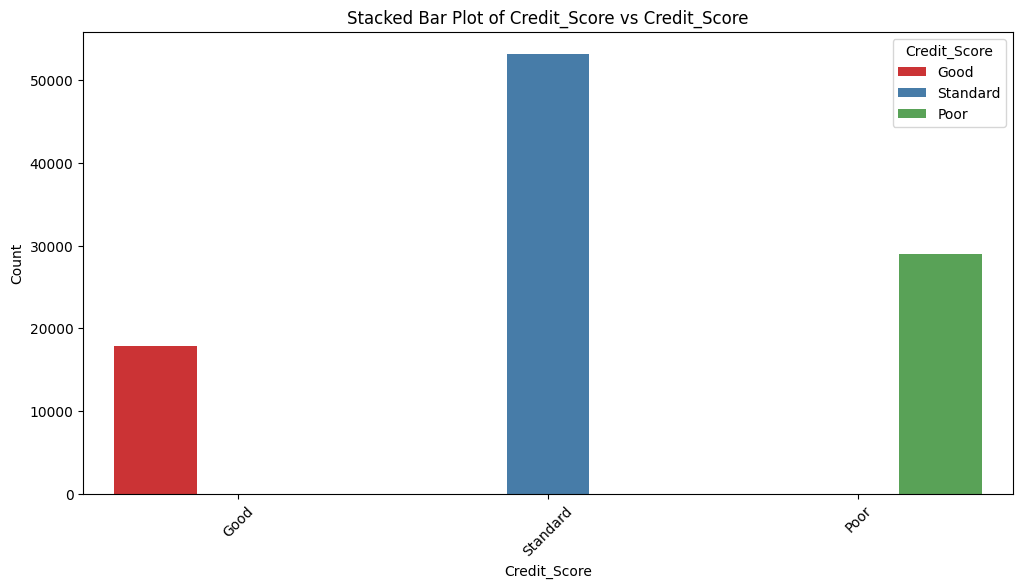

In [14]:
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=feature, hue='Credit_Score', palette='Set1')
    plt.title(f'Stacked Bar Plot of {feature} vs Credit_Score')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Credit_Score')
    plt.xticks(rotation=45)
    plt.show()

### From the above we can observe that the only useful features here are Payment_of_Min_Amount and Credit_Mix and Credit_Score (obviously)

In [15]:
columns_to_remove = ['Payment_of_Min_Amount', 'Credit_Mix', 'Credit_Score']
columns_to_add_back = ['Name', 'Type_of_Loan']

categorical_features = [
    feat for feat in categorical_features if feat not in columns_to_remove
]
categorical_features.extend(columns_to_add_back)

In [16]:
categorical_features

['Occupation', 'Payment_Behaviour', 'Name', 'Type_of_Loan']

In [17]:
mydf = df.drop(columns=categorical_features)

In [18]:
columns_to_drop = ['ID','Customer_ID','Month','SSN']

In [19]:
mydf = mydf.drop(columns=columns_to_drop)

In [20]:
mydf

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0       23       19114.12            1824.843333                  3   
1       23       19114.12            1824.843333                  3   
2       23       19114.12            1824.843333                  3   
3       23       19114.12            1824.843333                  3   
4       23       19114.12            1824.843333                  3   
...    ...            ...                    ...                ...   
99995   25       39628.99            3359.415833                  4   
99996   25       39628.99            3359.415833                  4   
99997   25       39628.99            3359.415833                  4   
99998   25       39628.99            3359.415833                  4   
99999   25       39628.99            3359.415833                  4   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                    4              3            4                    3   
1                    4              3            4                    3   
2                    4              3            4                    3   
3                    4              3            4                    5   
4                    4              3            4                    6   
...                ...            ...          ...                  ...   
99995                6              7            2                   23   
99996                6              7            2                   18   
99997                6              7            2                   27   
99998                6              7            2                   20   
99999                6              7            2                   18   

       Num_of_Delayed_Payment  Changed_Credit_Limit  ...  Credit_Mix  \
0                           7                 11.27  ...        Good   
1                           4                 11.27  ...        Good   
2                           7                 11.27  ...        Good   
3                           4                  6.27  ...        Good   
4                           4                 11.27  ...        Good   
...                       ...                   ...  ...         ...   
99995                       7                 11.50  ...        Good   
99996                       7                 11.50  ...        Good   
99997                       6                 11.50  ...        Good   
99998                       6                 11.50  ...        Good   
99999                       6                 11.50  ...        Good   

      Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0               809.98                 26.822620                 265   
1               809.98                 31.944960                 266   
2               809.98                 28.609352                 267   
3               809.98                 31.377862                 268   
4               809.98                 24.797347                 269   
...                ...                       ...                 ...   
99995           502.38                 34.663572                 378   
99996           502.38                 40.565631                 379   
99997           502.38                 41.255522                 380   
99998           502.38                 33.638208                 381   
99999           502.38                 34.192463                 382   

       Payment_of_Min_Amount Total_EMI_per_month  Amount_invested_monthly  \
0                         No           49.574949                21.465380   
1                         No           49.574949                21.465380   
2                         No           49.574949                21.465380   
3                         No           49.574949                21.465380   
4                         No           49.574949                21.465380   
...                      ...                 ...             

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [22]:
X = mydf.drop(columns = ['Credit_Score','Credit_Value'], axis=1)
y = mydf['Credit_Score']

In [23]:
X.head()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0   23       19114.12            1824.843333                  3   
1   23       19114.12            1824.843333                  3   
2   23       19114.12            1824.843333                  3   
3   23       19114.12            1824.843333                  3   
4   23       19114.12            1824.843333                  3   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                4              3            4                    3   
1                4              3            4                    3   
2                4              3            4                    3   
3                4              3            4                    5   
4                4              3            4                    6   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                       7                 11.27                     4   
1                       4                 11.27                     4   
2                       7                 11.27                     4   
3                       4                  6.27                     4   
4                       4                 11.27                     4   

  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0       Good            809.98                 26.822620                 265   
1       Good            809.98                 31.944960                 266   
2       Good            809.98                 28.609352                 267   
3       Good            809.98                 31.377862                 268   
4       Good            809.98                 24.797347                 269   

  Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                    No            49.574949                 21.46538   
1                    No            49.574949                 21.46538   
2                    No            49.574949                 21.46538   
3                    No            49.574949                 21.46538   
4                    No            49.574949                 21.46538   

   Monthly_Balance  
0       312.494089  
1       284.629163  
2       331.209863  
3       223.451310  
4       341.489231

In [24]:
y.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: Credit_Score, dtype: object

In [25]:
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

In [26]:
X.head()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0   23       19114.12            1824.843333                  3   
1   23       19114.12            1824.843333                  3   
2   23       19114.12            1824.843333                  3   
3   23       19114.12            1824.843333                  3   
4   23       19114.12            1824.843333                  3   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                4              3            4                    3   
1                4              3            4                    3   
2                4              3            4                    3   
3                4              3            4                    5   
4                4              3            4                    6   

   Num_of_Delayed_Payment  Changed_Credit_Limit  ...  Credit_History_Age  \
0                       7                 11.27  ...                 265   
1                       4                 11.27  ...                 266   
2                       7                 11.27  ...                 267   
3                       4                  6.27  ...                 268   
4                       4                 11.27  ...                 269   

   Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  \
0            49.574949                 21.46538       312.494089   
1            49.574949                 21.46538       284.629163   
2            49.574949                 21.46538       331.209863   
3            49.574949                 21.46538       223.451310   
4            49.574949                 21.46538       341.489231   

   Credit_Mix_Bad  Credit_Mix_Good  Credit_Mix_Standard  \
0               0                1                    0   
1               0                1                    0   
2               0                1                    0   
3               0                1                    0   
4               0                1                    0   

   Payment_of_Min_Amount_NM  Payment_of_Min_Amount_No  \
0                         0                         1   
1                         0                         1   
2                         0                         1   
3                         0                         1   
4                         0                         1   

   Payment_of_Min_Amount_Yes  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 23 columns]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [28]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# Make predictions
y_pred = clf.predict(X_test)

In [30]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [31]:
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.8147333333333333
Classification Report:
               precision    recall  f1-score   support

        Good       0.78      0.77      0.78      2627
        Poor       0.80      0.85      0.82      4421
    Standard       0.84      0.81      0.82      7952

    accuracy                           0.81     15000
   macro avg       0.80      0.81      0.81     15000
weighted avg       0.82      0.81      0.81     15000



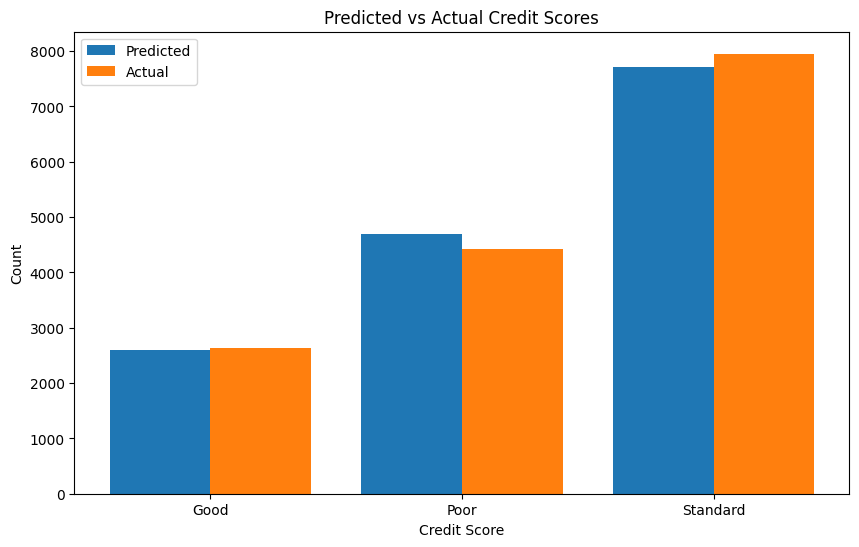

In [32]:
y_pred_series = pd.Series(y_pred, name='Predicted')
y_test_series = pd.Series(y_test, name='Actual')

predicted_counts = y_pred_series.value_counts().sort_index()
actual_counts = y_test_series.value_counts().sort_index()

# Create a bar plot
x_ticks = np.arange(len(predicted_counts))
plt.figure(figsize=(10, 6))
plt.bar(x_ticks - 0.2, predicted_counts, width=0.4, label='Predicted')
plt.bar(x_ticks + 0.2, actual_counts, width=0.4, label='Actual')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Predicted vs Actual Credit Scores')
plt.xticks(x_ticks, predicted_counts.index)
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import confusion_matrix

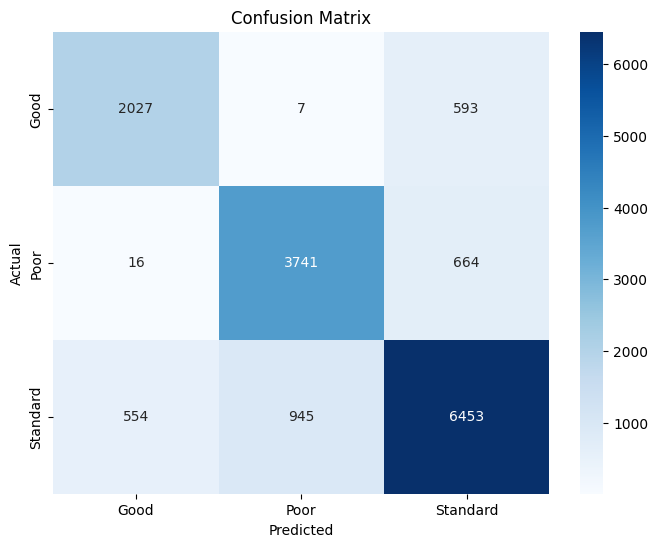

In [34]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['Good', 'Poor', 'Standard'])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Poor', 'Standard'], yticklabels=['Good', 'Poor', 'Standard'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### The model is very rarely predicting 'Good' as 'Poor' and vice versa so its not bad, but can be improved.

### Now for numerical output variable

In [35]:
# Create box plots for each numerical feature
numerical_features = mydf.select_dtypes(include=['int64', 'float64']).columns

In [36]:
numerical_features

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_Value'],
      dtype='object')

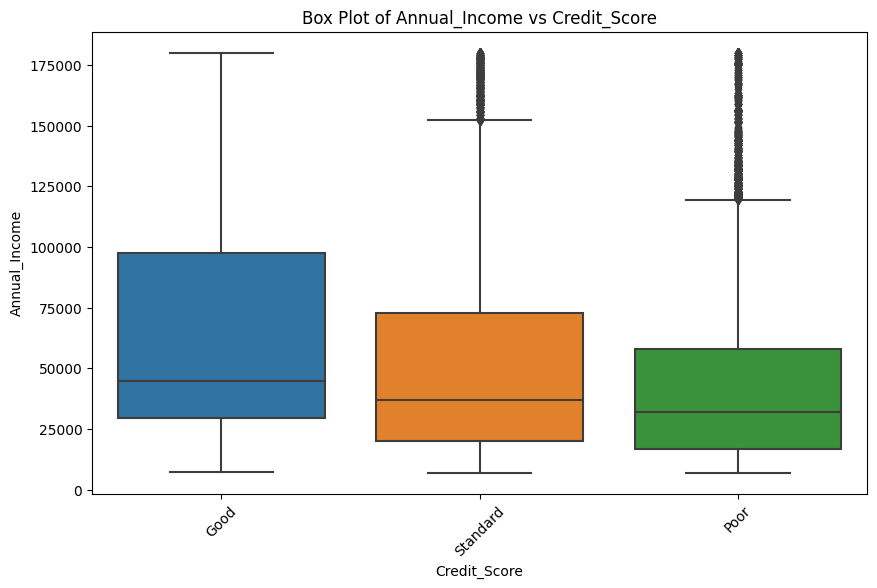

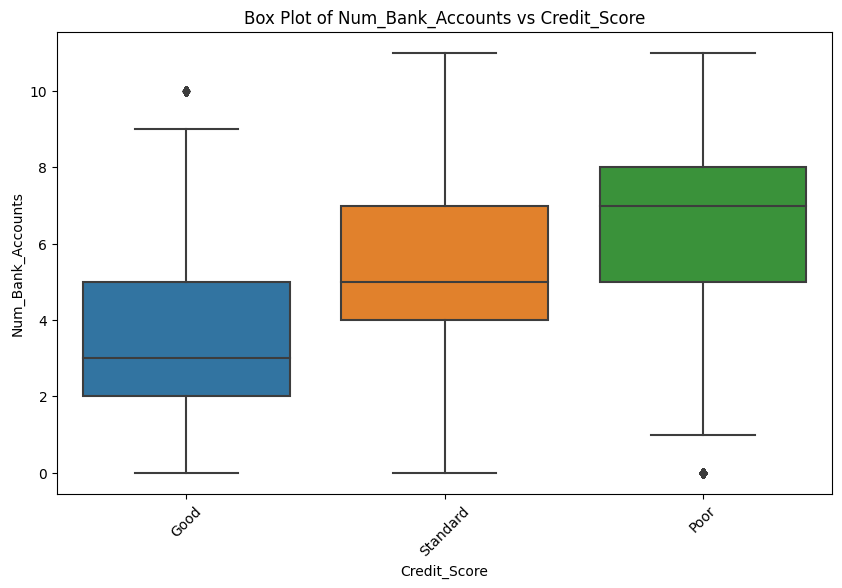

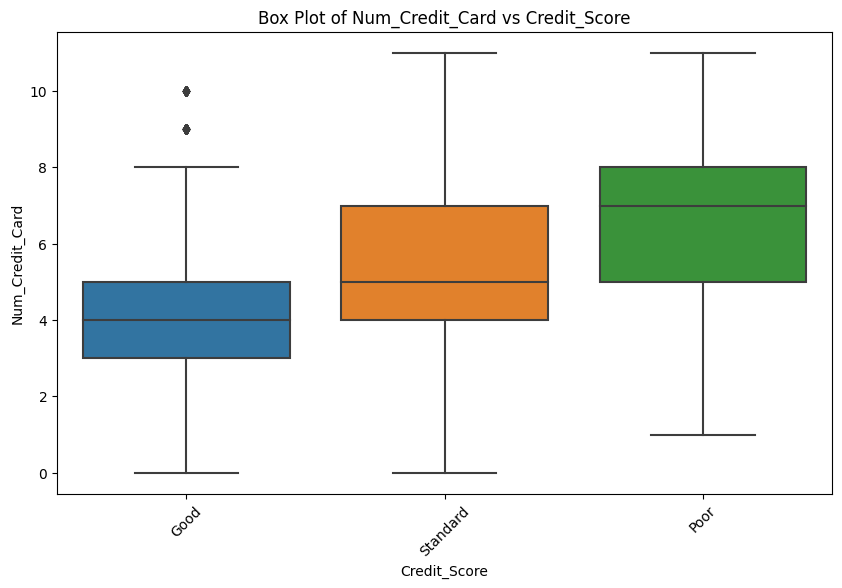

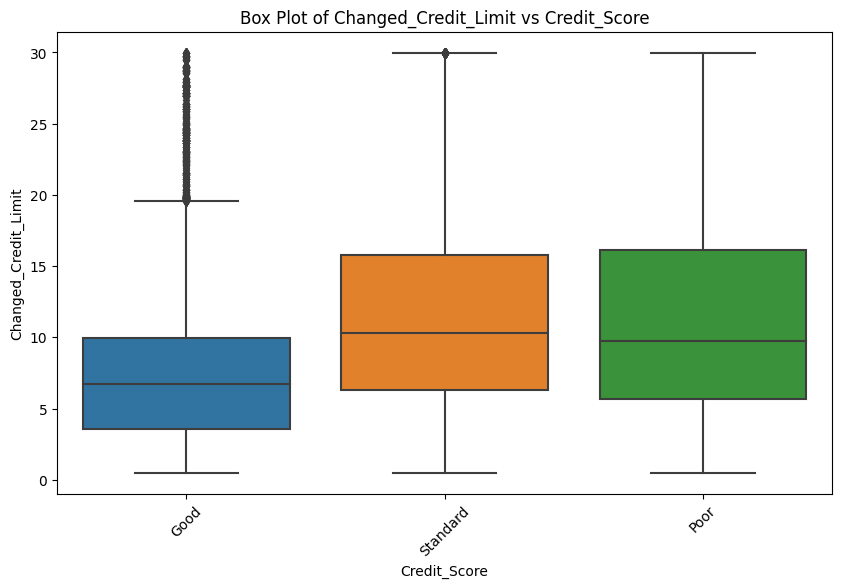

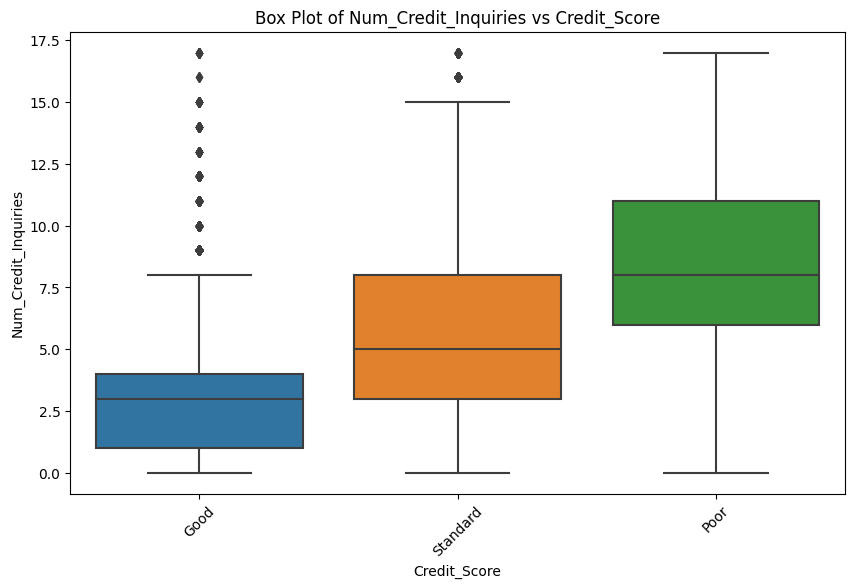

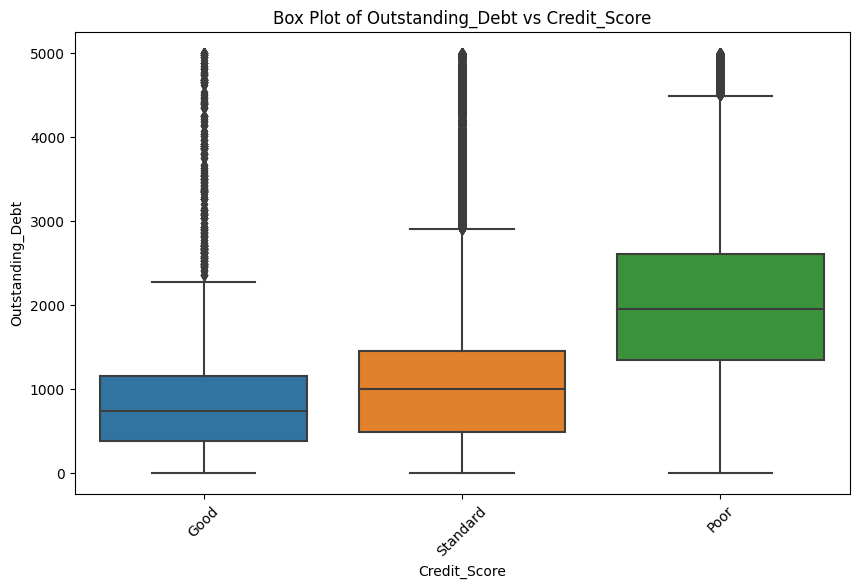

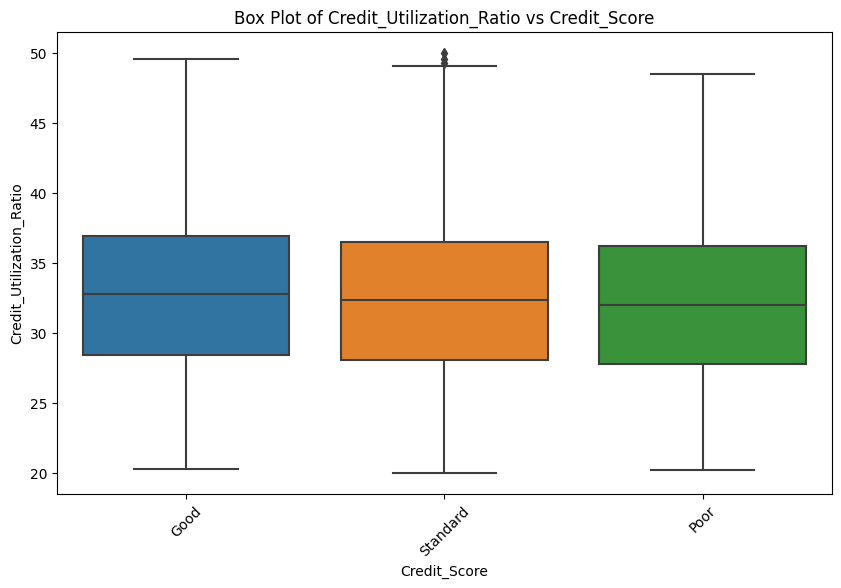

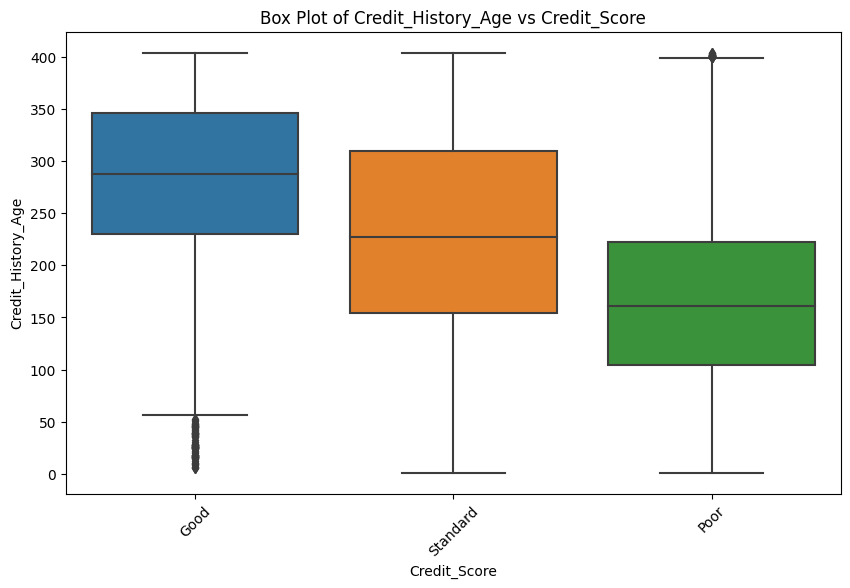

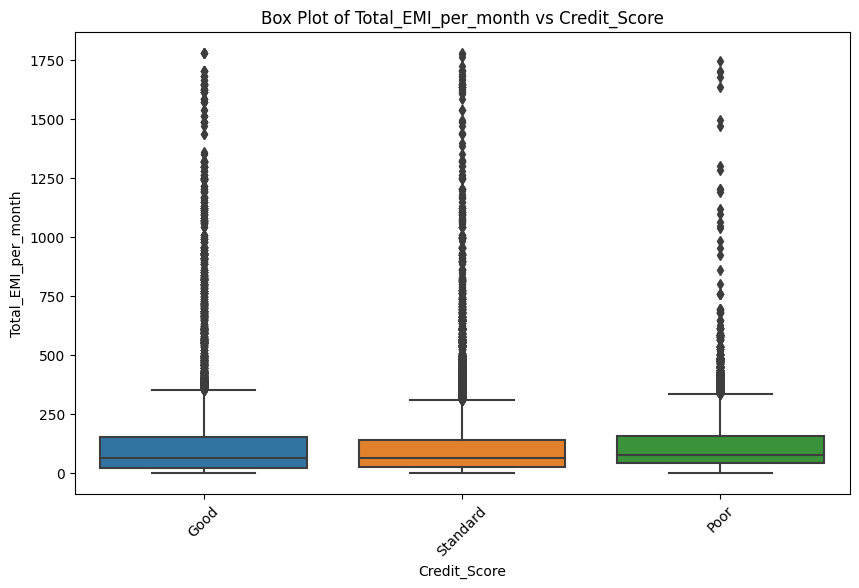

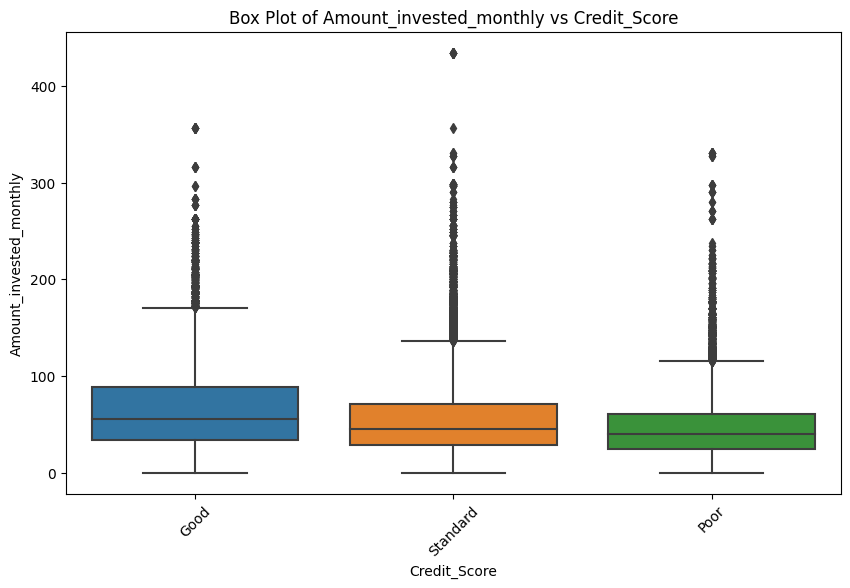

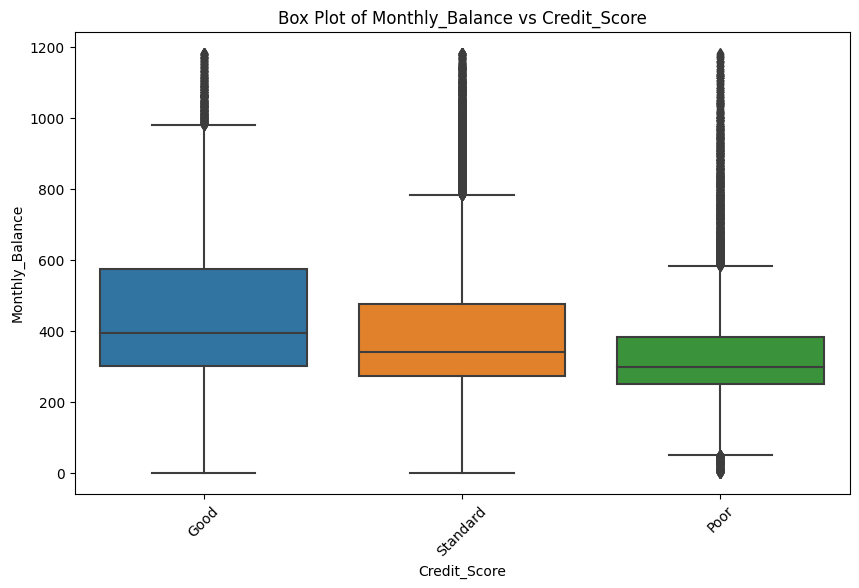

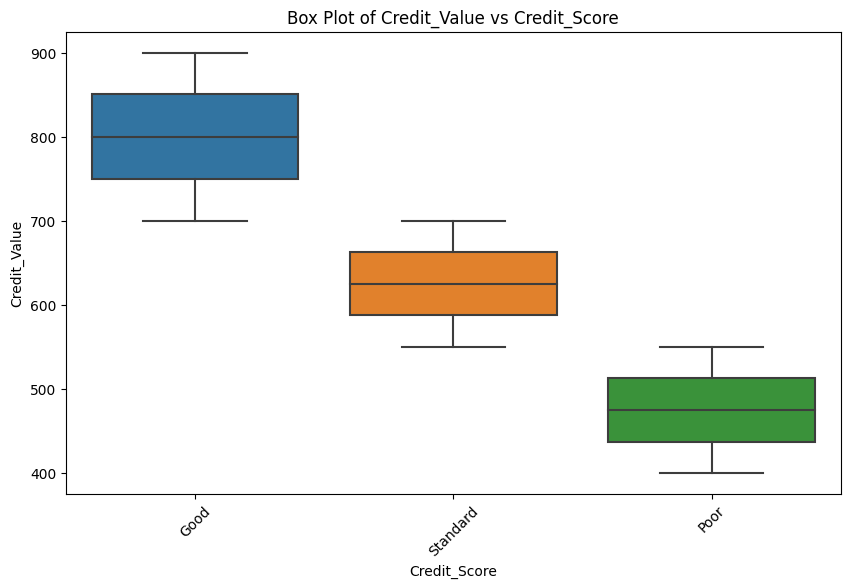

In [37]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Credit_Score', y=feature)
    plt.title(f'Box Plot of {feature} vs Credit_Score')
    plt.xlabel('Credit_Score')
    plt.ylabel(feature)
    plt.xticks(rotation=45)
    plt.show()

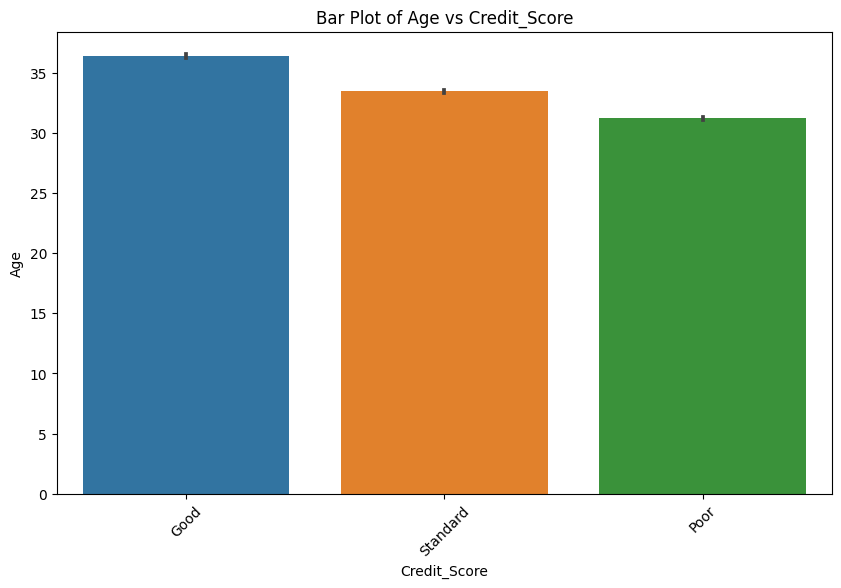

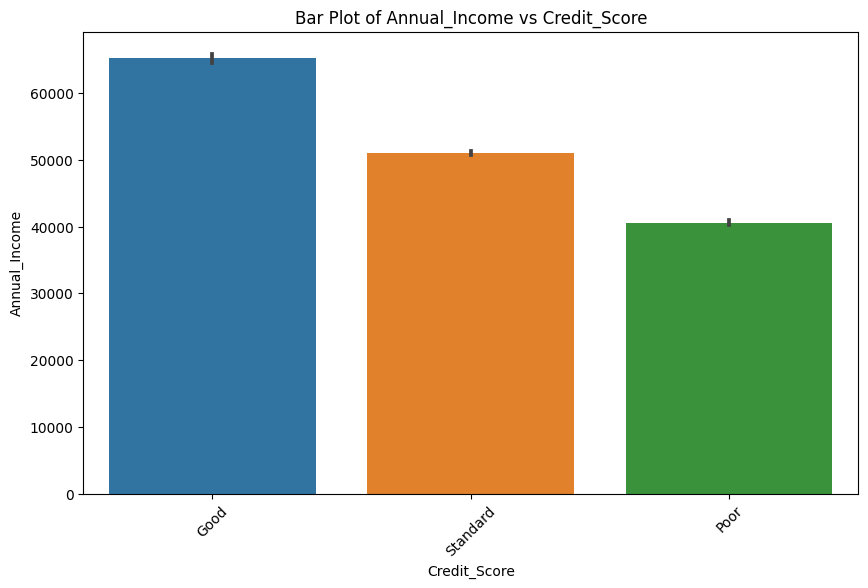

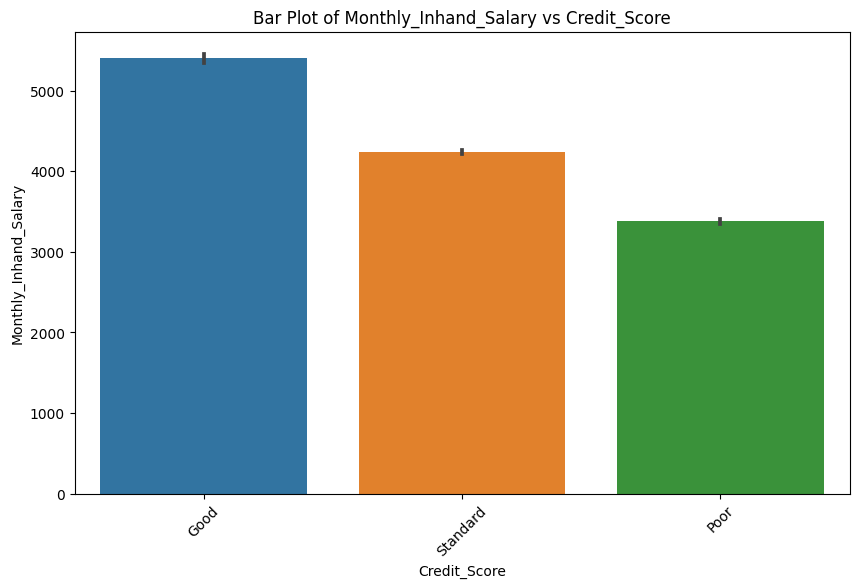

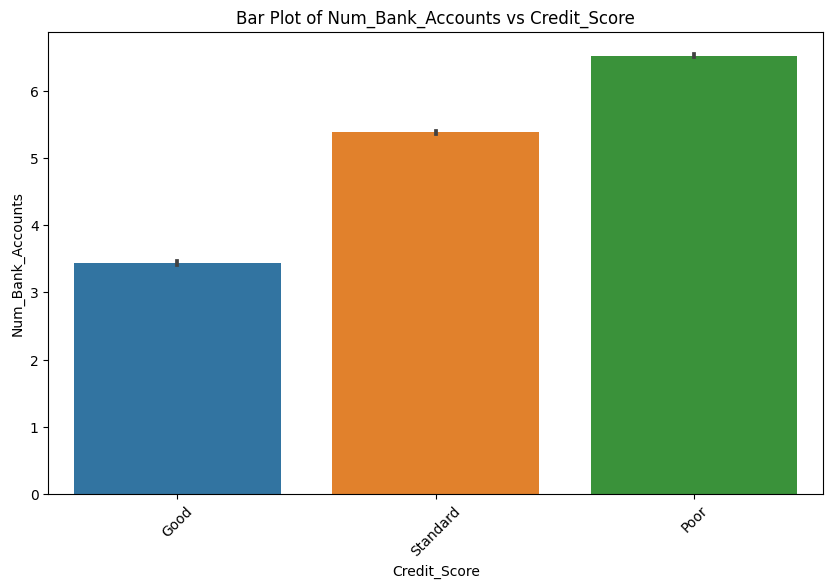

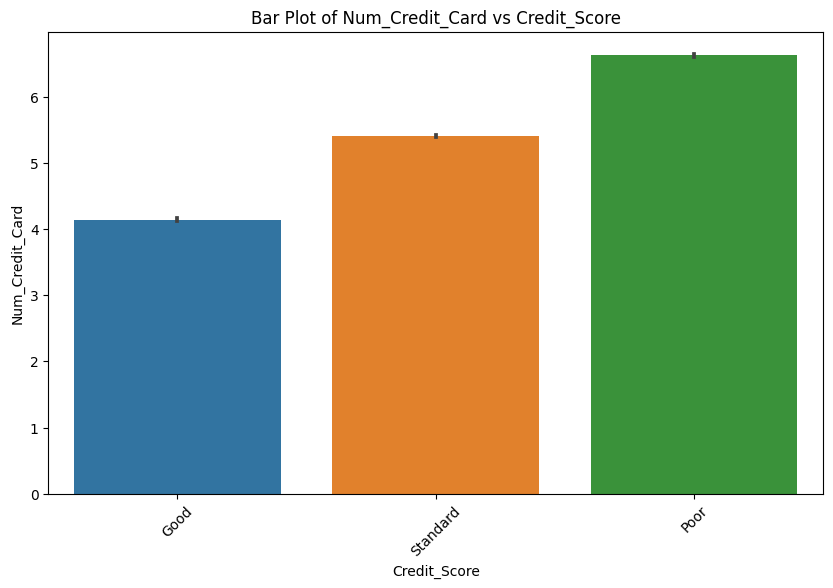

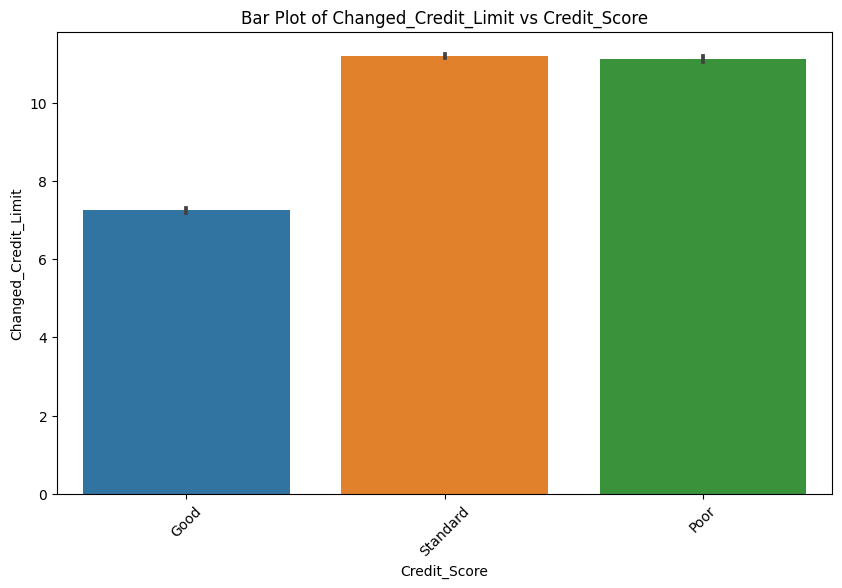

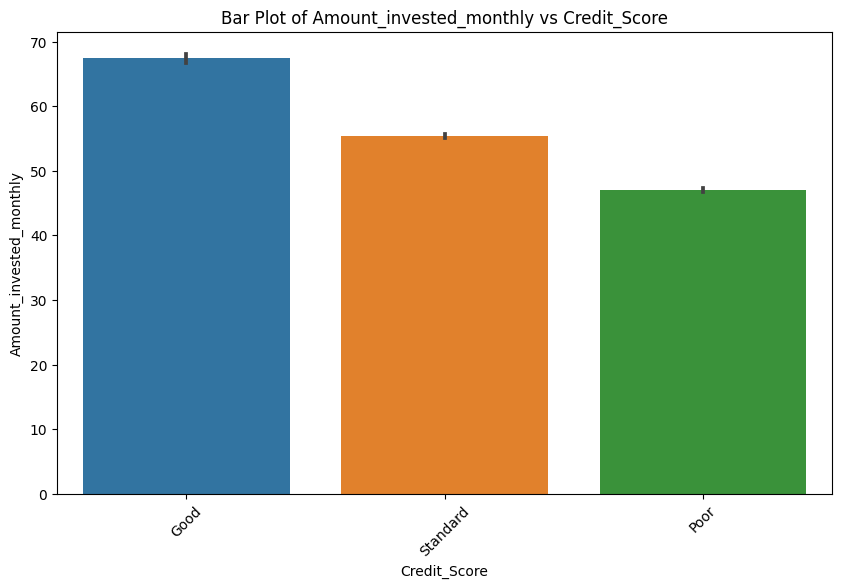

In [38]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x='Credit_Score', y=feature)
    plt.title(f'Bar Plot of {feature} vs Credit_Score')
    plt.xlabel('Credit_Score')
    plt.ylabel(feature)
    plt.xticks(rotation=45)
    plt.show()


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
X = mydf.drop(columns = ['Credit_Value','Credit_Score'], axis=1)
y = mydf['Credit_Value']

In [41]:
X.head()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0   23       19114.12            1824.843333                  3   
1   23       19114.12            1824.843333                  3   
2   23       19114.12            1824.843333                  3   
3   23       19114.12            1824.843333                  3   
4   23       19114.12            1824.843333                  3   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                4              3            4                    3   
1                4              3            4                    3   
2                4              3            4                    3   
3                4              3            4                    5   
4                4              3            4                    6   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                       7                 11.27                     4   
1                       4                 11.27                     4   
2                       7                 11.27                     4   
3                       4                  6.27                     4   
4                       4                 11.27                     4   

  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0       Good            809.98                 26.822620                 265   
1       Good            809.98                 31.944960                 266   
2       Good            809.98                 28.609352                 267   
3       Good            809.98                 31.377862                 268   
4       Good            809.98                 24.797347                 269   

  Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                    No            49.574949                 21.46538   
1                    No            49.574949                 21.46538   
2                    No            49.574949                 21.46538   
3                    No            49.574949                 21.46538   
4                    No            49.574949                 21.46538   

   Monthly_Balance  
0       312.494089  
1       284.629163  
2       331.209863  
3       223.451310  
4       341.489231

In [42]:
print(X.shape)

(100000, 19)


In [43]:
y.head()

0    727
1    894
2    799
3    728
4    739
Name: Credit_Value, dtype: int64

In [44]:
print(y.shape)

(100000,)


In [45]:
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

In [46]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Create and train a Random Forest Regressor
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [48]:
# Make predictions
y_pred = regressor.predict(X_test)

In [49]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [50]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 6247.717308129999
R-squared: 0.5517360702186946


In [51]:
data = {'Actual': y_test, 'Predicted': y_pred}
df_results = pd.DataFrame(data)

In [52]:
sorted_df = df_results.sort_values(by='Actual')

In [53]:
sorted_y_test = sorted_df['Actual'].values
sorted_y_pred = sorted_df['Predicted'].values

In [54]:
sorted_y_pred = np.sort(y_pred)
sorted_y_test = np.sort(y_test)

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(sorted_y_test, label='Actual')
plt.plot(sorted_y_pred, label='Predicted')
plt.xlabel('Instances')
plt.ylabel('Credit_Value')
plt.title('Sorted Predicted vs Actual Credit Values')
plt.legend()
plt.show()

### Its not predicting well but can be sorted by changing how its calculated

In [56]:
# Load your dataset

# Define the list of attributes to compare with Credit_Value
attributes_to_compare = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
    'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
    'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
    'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly',
    'Monthly_Balance', 'Credit_Score'
]

# Define the number of rows and columns for the subplot grid
num_rows = len(attributes_to_compare)
num_cols = 1

# Create a matrix of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)

# Loop through each attribute and create a histogram against Credit_Value
for i, attribute in enumerate(attributes_to_compare):
    ax = axes[i]

    sns.histplot(data=df, x=attribute, hue='Credit_Value', ax=ax, multiple='stack')
    ax.set_title(f'Histogram of {attribute} vs Credit_Value')
    ax.set_xlabel(attribute)
    ax.set_ylabel('Frequency')
    ax.legend(title='Credit_Value', labels=df['Credit_Value'].unique())

plt.tight_layout()
plt.show()


<ipython-input-56-d6db6af4f815>:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
<ipython-input-56-d6db6af4f815>:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
